### The purpose of this notebook
圏論という数学の分野に「米田の補題」という定理がある．この定理は，任意のオブジェクトはそのオブジェクト単体では性質が決まらず，そのオブジェクトが他のオブジェクトとどのように関係しているかという圏論的構造＝関係性のネットワークによって，各オブジェクトの性質が決定されることを主張している．この考え方に基づき，川北源二らは，被験者から集めた様々な色の主観的類似度データを，色のクオリア体験にかかる距離データとみなすことを提案した（[Kawakita et.al 2023](https://psyarxiv.com/h3pqm/)）．この米田の補題的視点に立てば，異なる2つの色の主観的類似度のデータの集積が，個々の色の性質を特徴づける．次に川北らは，2人の観測者の主観的体験の構造（クオリア構造）の類似度を比較する統計的アプローチを検討した．これは，2人の観測者のクオリアが全く同じ数学的性質を持つ空間に属している保証はない，ということを前提にすると，数学的に異なる空間に存在する2組のデータの類似度を何らかの方法で評価する，という問題に帰着する．実は，機械学習の分野ですでにこの問題を扱う統計的アプローチが開発されており，Gromov-Wasserstein距離（GWD）という距離尺度が，このような問題を解く上で適していることが知られている，

<img src="https://hayashiyus.jp/wp-content/uploads/2023/06/gwd.png" alt= “two-datasets” width="700" height="350">

1. 2つのデータの経験分布（それぞれのデータは異なる距離空間 $\left(\mathcal{X}, d_{\mathcal{X}}\right)$, $\left(\mathcal{Y}, d_{\mathcal{Y}}\right)$ 上に存在）

   $\begin{aligned}
   \alpha & =\sum_{i=1}^n \boldsymbol{a}_i \delta_{x_i} \in \mathcal{P}(\mathcal{X}) \\
   \beta & =\sum_{i=1}^m \boldsymbol{b}_i \delta_{y_i} \in \mathcal{P}(\mathcal{Y})
   \end{aligned}$

2. Gromov-Wasserstein距離（GWD：距離分布の距離を計算）

   $\mathrm{GWD}_p(\alpha, \beta) \stackrel{\text { def }}{=} \left(\min _{\boldsymbol{P} \in \mathcal{U}(\boldsymbol{a}, \boldsymbol{b})} \sum_{\substack{x_1, x_2 \in \mathcal{X} \\ y_1, y_2 \in \mathcal{Y}}} \boldsymbol{P}_{x_1 y_1} \boldsymbol{P}_{x_2 y_2}\left|d \mathcal{X}\left(x_1, x_2\right)-d \mathcal{Y}\left(y_1, y_2\right)\right|^p\right)^{1 / p}$

我々はこの分析アプローチを，2022年後半から世界を席巻した大規模言語モデル（LLMs）の解析に応用することを検討する．川北らの分析の問題点の１つとして，主観的体験の類似度を，観測者自身のアンケートから収集している点が挙げられる．例えば，ラーメンとステーキの美味しさの距離，ラーメンとお寿司の美味しさの距離を答えなさい，と言われて，筆者には毎回同じ数字を答えられる自信がない．一方，脳のハードプロブレムに較べれば，何倍も解析が簡単な深層学習モデルにおいては，潜在表現 $\mathbf{z}$（埋め込み表現，隠れ表現，特徴量）間の距離を厳密に計算するプロトコルが存在することが知られている．

1. 統計モデルのデコーダー

   $\mathbf{x}=f(\mathbf{z})$

2. 潜在表現間の距離を定める線素

   $\left\|f\left(\mathbf{z}+\Delta \mathbf{z}_1\right)-f\left(\mathbf{z}+\Delta \mathbf{z}_2\right)\right\|^2=\left(\Delta \mathbf{z}_1-\Delta \mathbf{z}_2\right)^{\boldsymbol{\top}}\left(\mathbf{J}^{\boldsymbol{\top}} \mathbf{J}\right)\left(\Delta \mathbf{z}_1-\Delta \mathbf{z}_2\right), \quad \mathbf{J}=\left.\frac{\partial f}{\partial \mathbf{z}}\right|_{\mathbf{z}=\mathbf{z}}$

3. 潜在表現 $\mathbf{z}(t=0), \mathbf{z}(t=1)$ 間の距離

   $\left\langle\mathbf{z}^{\prime}, \mathbf{z}^{\prime}\right\rangle_{\mathbf{z}} \stackrel{\text { def }}{=} \mathbf{z}^{\prime T} \mathbf{G}(\mathbf{z}) \mathbf{z}^{\prime}=\mathbf{z}^{\prime T} \mathbf{J}^{\boldsymbol{\top}} \mathbf{J} \mathbf{z}^{\prime}$

   $\begin{aligned}
   L(\gamma) & \stackrel{\text { def }}{=} \int_0^1\left\|\frac{\partial f(\gamma(t))}{\partial t}\right\| \mathrm{d} t \\
   & =\int_0^1\left\|\frac{\partial f(\gamma(t))}{\partial \gamma(t)} \frac{\partial \gamma(t)}{\partial t}\right\| \mathrm{d} t \\
   & =\int_0^1\left\|\mathbf{J} \frac{\partial \gamma(t)}{\partial t}\right\| \mathrm{d} t \\
   & =\int_0^1 \sqrt{\left\langle\gamma^{\prime}(t), \gamma^{\prime}(t)\right\rangle_{\gamma(t)}} \mathrm{d} t
   \end{aligned}$

<img src="https://hayashiyus.jp/wp-content/uploads/2023/06/geodesic_distance_in_ls.png" alt= “latent-space-distance” width="700" height="350">

この潜在空間の幾何学的な距離を測るツールを準備することで，LLMsと画像生成AI（拡散モデル）の潜在空間の構造の類似度を評価したい．

LLMsは，VAEや拡散モデルのように Encoder と Decoder が明確なモデルとは異なり，Transformer Decoder ブロック が何層にも重なったアーキテクチャになっている．そこで〇〇の手法を応用することで，アーキテクチャをどこで2分割すると情報生成量が最大になるかを特定し，その分割線上の潜在空間の構造を調査する

<img src="https://hayashiyus.jp/wp-content/uploads/2023/06/entropy-production.png" alt= “entropy-production” width="700" height="400">

#### Section 1: LLM
- [1. Dive into LLMs latent space](#1-dive-into-llms-latent-space)
  - [1-1. Visualizing embeddings in our LLMs](#1-1-visualizing-embeddings-in-our-llms)
  - [1-2. Visualizing embeddings in OpenAI's offial API (GPT-2)](#1-2-visualizing-embeddings-in-openais-offial-api-gpt-2)
  - [1-3. Disassembling LLMs decoder](#1-3-disassembling-llms-decoder)
  - [1-4. Calculate the shortest distance between any two points in LLMs latent space](#1-4-calculate-the-shortest-distance-between-any-two-points-in-llms-latent-space)
#### Section 2: Text-to-Image Generators
- [2. Dive into text-to-image generators latent space](#2-dive-into-text-to-image-generators-latent-space)
  - [2-1. Disassembling text-to-image generative AI's decoder](#2-1-disassembling-text-to-image-generative-ais-decoder)
  - [2-2. Calculate the shortest distance between any two points in Stable Diffusion's latent space](#2-2-calculate-the-shortest-distance-between-any-two-points-in-stable-diffusions-latent-space)
#### Section 3: Gromov–Wasserstein Distance
- [3. Measure the similarity of distance distributions in two different spaces using GWD](#3-measure-the-similarity-of-distance-distributions-in-two-different-spaces-using-gwd)
#### Section 4: References
- [4. References](#4-references)
#### Section 5: Appendix
- [5. Appendix](#5-appendix)


### 1. Dive into LLMs latent space
<br>① LLMs can generate sentences following input prompts. ② The input prompt is first converted into a vector called a token. These tokens are then fed into the deep learning module and output as tokens.</br>
<img src="https://jalammar.github.io/images/gpt3/05-gpt3-generate-output-context-window.gif" alt= “https://jalammar.github.io/how-gpt3-works-visualizations-animations/” width="700" height="370">
<img src="https://jalammar.github.io/images/gpt3/06-gpt3-embedding.gif" alt= “https://jalammar.github.io/how-gpt3-works-visualizations-animations/” width="700" height="370">
<br>③ The internal structure of LLMs is composed of multiple layers of Transformer blocks. ④ Integrating the explanations ①-③, we obtain the following diagram.</br>
<img src="https://jalammar.github.io/images/gpt3/07-gpt3-processing-transformer-blocks.gif" alt= “https://jalammar.github.io/how-gpt3-works-visualizations-animations/” width="700" height="370">
<img src="https://jalammar.github.io/images/gpt3/08-gpt3-tokens-transformer-blocks.gif" alt= “https://jalammar.github.io/how-gpt3-works-visualizations-animations/” width="700" height="370">

[[Blog] How GPT3 Works - Visualizations and Animations](https://jalammar.github.io/how-gpt3-works-visualizations-animations/)

我々はこのLLMs内部で処理されている埋め込み表現（emmbeddings）が作る空間を潜在空間（or 特徴量空間）とみなし，その幾何構造（リーマン計量，測地線など）を調査する．

In [1]:
# Import libraries
import torch
import torchvision
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm

# Import GPT-2 and stable diffusion decoders
from diffusers import StableDiffusionPipeline
from transformers import AutoTokenizer, AutoModelForCausalLM, GPT2Tokenizer, GPT2LMHeadModel, GPT2Model

torch.manual_seed(234)

# Define parameters and functions for LLM
#tokenizer = AutoTokenizer.from_pretrained("cyberagent/open-calm-small")
#model = AutoModelForCausalLM.from_pretrained('cyberagent/open-calm-small')
#lm_model = AutoModelForCausalLM.from_pretrained("cyberagent/open-calm-small", output_hidden_states=True)
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = GPT2Model.from_pretrained('gpt2')
lm_model = GPT2LMHeadModel.from_pretrained("gpt2", output_hidden_states=True)
# tokenizer = GPT2Tokenizer.from_pretrained("gpt2", n_embd=2, n_head=1, ignore_mismatched_sizes=True)
# model = GPT2Model.from_pretrained('gpt2', n_embd=2, n_head=1, ignore_mismatched_sizes=True)
# lm_model = GPT2LMHeadModel.from_pretrained("gpt2", output_hidden_states=True, n_embd=2, n_head=1, ignore_mismatched_sizes=True)
# Add a [PAD] token to the tokenizer
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token':'[PAD]'})
model.eval()
lm_model.eval()

prompt = str("dog and cat, walking, bloom, high quality, very high resolution, colorful refraction, lens flare")
negative_prompt = str("bad anatomy, bad hands, text, error, missing fingers, extra digit, extra tail, fewer digits,  multiple legs, malformation, close up")
# Encode the prompt into tokens
input_ids = tokenizer.encode(prompt, return_tensors="pt")

def lm_generate(input_ids):
    # Generate tokens from the prompt using LLM
    gen_output = model(input_ids)
    gen_embeddings = lm_model(input_ids,
                              labels=input_ids)                             
    gen_token = lm_model.generate(input_ids,
                                  do_sample=True,
                                  temperature=0.9,
                                  max_length=100,
                                  labels=input_ids)
    return gen_output, gen_embeddings, gen_token

# Generate a text from text using LLM
generated_output, generated_embeddings, generated_token = lm_generate(input_ids)

lm_output = generated_output[0]
lm_hidden_states = generated_embeddings[3]
lm_text = tokenizer.batch_decode(generated_token)[0]

# Iterate over the hidden states and the input ids to print the hidden state for each token
for hidden_state, input_id in tqdm(zip(lm_hidden_states, input_ids[0])):
    print(f"Token: {tokenizer.decode([input_id])}, Hidden State: {hidden_state}")
print('----------------------------------')
# The hidden_states[12] would be the same as outputs[0] 
print(lm_output[:, -1, :] - lm_hidden_states[lm_model.config.n_layer][:, -1, :])
print('----------------------------------')
# Print the generated text
print(lm_text)

Using pad_token, but it is not set yet.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


0it [00:00, ?it/s]

Token: dog, Hidden State: tensor([[[ 0.0438, -0.1308,  0.1001,  ..., -0.1355,  0.3432, -0.0854],
         [-0.0289, -0.0549, -0.0646,  ...,  0.1269,  0.0237,  0.0739],
         [ 0.0142, -0.0482,  0.2185,  ...,  0.0223, -0.0218, -0.0909],
         ...,
         [ 0.0122,  0.0257,  0.1078,  ...,  0.0240, -0.0322, -0.0626],
         [ 0.0340, -0.0815,  0.1962,  ..., -0.0479,  0.1701,  0.1331],
         [ 0.0236, -0.0846,  0.1330,  ..., -0.1557,  0.0481, -0.0010]]],
       grad_fn=<AddBackward0>)
Token:  and, Hidden State: tensor([[[ 1.0107, -1.5312,  0.3837,  ..., -0.3640,  0.2079, -0.7771],
         [ 1.4044, -0.3773, -1.2492,  ..., -0.2825,  0.6471, -0.1855],
         [ 0.0342, -0.9445, -0.1895,  ..., -0.0384, -0.5777,  0.3367],
         ...,
         [ 1.4375, -0.0858,  0.8566,  ...,  1.3948, -0.2329,  0.1633],
         [ 1.7753,  1.7201,  0.5491,  ..., -0.2539,  1.1650, -1.9987],
         [ 3.1040, -1.6057,  1.9876,  ..., -1.0235,  2.2115, -1.1049]]],
       grad_fn=<AddBackward0>)
T

In [2]:
print(len(input_ids[0]))
print(lm_hidden_states[0].size())
print(lm_hidden_states[lm_model.config.n_layer].size())

for i in tqdm(range(0, lm_model.config.n_layer + 1)):
    for j in range(0, len(input_ids[0])):
        lm_logit = lm_model.lm_head(lm_hidden_states[i][:, j, :])
        print(i, tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(lm_logit.argmax(-1).tolist())))


21
torch.Size([1, 21, 768])
torch.Size([1, 21, 768])


  0%|          | 0/13 [00:00<?, ?it/s]

0 dog
0  and
0  cat
0 ,
0  walking
0 ,
0  bloom
0 ,
0  high
0  quality
0 ,
0  very
0  high
0  resolution
0 ,
0  colorful
0  ref
0 raction
0 ,
0  lens
0  flare
1 ,
1  the
1  cat
1  the
1  the
1  the
1  bloom
1  the
1 -
1 ,
1  the
1  the
1 -
1  resolution
1  the
1 ,
1  ref
1 -
1  the
1 ,
1 -
2 ,
2  the
2  cat
2  the
2 ,
2  the
2  bloom
2  the
2 -
2  quality
2  the
2  well
2 -
2  resolution
2  the
2 ,
2  ref
2 -
2  the
2 ,
2 -
3  the
3  the
3 cat
3  the
3  the
3  the
3  bloom
3  the
3 -
3  quality
3  the
3  well
3 -
3  resolution
3  the
3 ,
3  ref
3 ,
3  the
3 ,
3 ,
4  the
4  the
4 cat
4  the
4  in
4  and
4  and
4  etc
4 -
4 ,
4  and
4  low
4 -
4 ,
4  the
4 ,
4 s
4 ,
4  the
4 ,
4 ,
5  the
5  the
5 cat
5  the
5  the
5  and
5  and
5  etc
5 -
5 ,
5  etc
5 ,
5 -
5 ,
5  the
5 ,
5 s
5 ,
5  the
5 ,
5 ,
6  the
6  the
6 -
6  the
6  in
6  and
6 -
6  etc
6 -
6 ,
6  and
6 ,
6 -
6 ,
6  and
6 ,
6 s
6 ,
6  the
6 -
6 ,
7  the
7  the
7 -
7  and
7  in
7  and
7 -
7  and
7 -
7 ,
7  and
7 ,
7 -
7 ,
7  the
7 ,

In [3]:
samples = pd.read_json("data/dbpedia_samples.jsonl", lines=True)
categories = sorted(samples["category"].unique())
print("Categories of DBpedia samples:", samples["category"].value_counts())
samples.head()

Categories of DBpedia samples: Artist                    21
Film                      19
Plant                     19
OfficeHolder              18
Company                   17
NaturalPlace              16
Athlete                   16
Village                   12
WrittenWork               11
Building                  11
Album                     11
Animal                    11
EducationalInstitution    10
MeanOfTransportation       8
Name: category, dtype: int64


,text,category
0,Morada Limited is a textile company based in ...,Company
1,The Armenian Mirror-Spectator is a newspaper ...,WrittenWork
2,Mt. Kinka (金華山 Kinka-zan) also known as Kinka...,NaturalPlace
3,Planning the Play of a Bridge Hand is a book ...,WrittenWork
4,Wang Yuanping (born 8 December 1976) is a ret...,Athlete


### 1-1. Visualizing embeddings in our LLMs

200
 Morada Limited is a textile company based in Altham Lancashire. Morada specializes in curtains.
torch.Size([200, 10])
tensor([ 3461,  4763, 15302,   318,   257, 45293,  1664,  1912,   287,   978])


  0%|          | 0/200 [00:00<?, ?it/s]

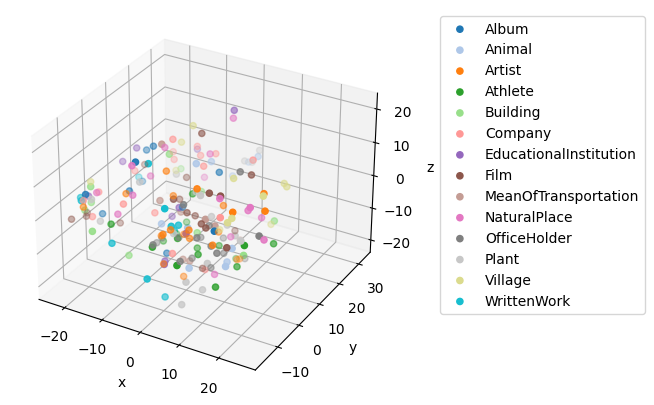

In [4]:
samples_prompt = samples["text"].to_list()
samples_ids = tokenizer.batch_encode_plus(samples_prompt, return_tensors="pt", padding='max_length', max_length=10, truncation=True)

print(len(samples_prompt))
print(samples_prompt[0])
print(samples_ids.input_ids.size())
print(samples_ids.input_ids[0])

# Generate a text from text using GPT-2
matrix_list = []
for i in tqdm(range(0, len(samples_prompt))):
    samples_input_ids = torch.reshape(samples_ids.input_ids[i], (1, -1))
    samples_embedding = lm_model(samples_input_ids, labels=samples_input_ids)
    lm_samples_hidden_state = samples_embedding[3]
    latent_state = lm_model.transformer.ln_f(lm_samples_hidden_state[0])
    matrix_list.append(latent_state[0].detach().cpu().tolist())

matrix_list_array = np.array(matrix_list)
matrix_list_array = np.reshape(matrix_list_array, (len(samples_prompt), -1))

from sklearn.decomposition import PCA
pca = PCA(n_components=3)
vis_dims = pca.fit_transform(matrix_list_array)
samples["embed_vis"] = vis_dims.tolist()

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(projection='3d')
cmap = plt.get_cmap('tab20')

# Plot each sample category individually such that we can set label name.
for i, cat in enumerate(categories):
    sub_matrix = np.array(samples[samples["category"] == cat]["embed_vis"].to_list())
    x=sub_matrix[:, 0]
    y=sub_matrix[:, 1]
    z=sub_matrix[:, 2]
    colors = [cmap(i/len(categories))] * len(sub_matrix)
    ax.scatter(x, y, zs=z, zdir='z', c=colors, label=cat)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend(bbox_to_anchor=(1.1, 1))

### 1-2. Visualizing embeddings in OpenAI's offial API (GPT-2)

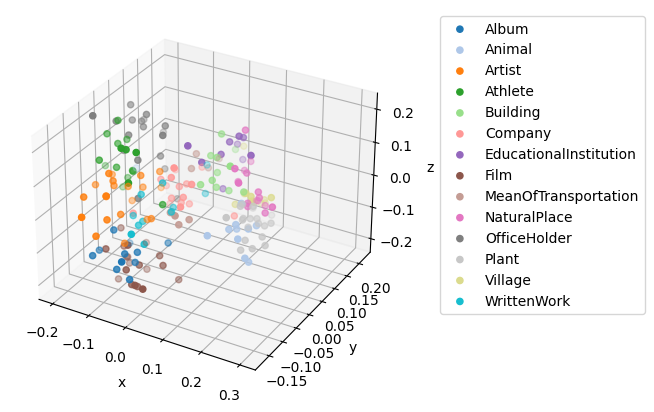

In [5]:
from openai.embeddings_utils import get_embeddings
# NOTE: The following code will send a query of batch size 200 to /embeddings
matrix = get_embeddings(samples["text"].to_list(), engine="text-embedding-ada-002")

from sklearn.decomposition import PCA
pca = PCA(n_components=3)
vis_dims = pca.fit_transform(matrix)
samples["embed_vis"] = vis_dims.tolist()

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(projection='3d')
cmap = plt.get_cmap('tab20')

# Plot each sample category individually such that we can set label name.
for i, cat in enumerate(categories):
    sub_matrix = np.array(samples[samples["category"] == cat]["embed_vis"].to_list())
    x=sub_matrix[:, 0]
    y=sub_matrix[:, 1]
    z=sub_matrix[:, 2]
    colors = [cmap(i/len(categories))] * len(sub_matrix)
    ax.scatter(x, y, zs=z, zdir='z', c=colors, label=cat)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend(bbox_to_anchor=(1.1, 1))

### 1-3. Calculate the shortest distance between any two points in LLMs latent space

In [6]:
from torch.autograd.functional import jacobian

# Step 1: Compute the Jacobian
%time lm_jac = jacobian(lm_model.transformer.ln_f, lm_hidden_states[0][:, 0, :])
print(lm_jac.size())

lm_J = torch.reshape(lm_jac, (1, lm_model.config.n_embd, -1))

print(lm_J.size())

# Step 2: Compute the Riemannian metric
def compute_riemannian_metric(J):
    return torch.einsum('bik,bjk->bij', J, J)

# Compute Riemannian metric
%time lm_riemannian_metric = compute_riemannian_metric(lm_J)

print(lm_riemannian_metric.size())

def line_element(metric, diff):
    return torch.sqrt(torch.sum(torch.matmul(diff.unsqueeze(-2), torch.matmul(metric, diff.unsqueeze(-1)))))

num_delta = 0.01
def lm_geodesic_distance(z0, z1, delta=num_delta):
    integrand = 0
    diff = (z1 - z0) * delta
    for i in tqdm(np.arange(0, 1 + delta, delta)):
        #jac = jacobian(lm_model.lm_head, z0 + diff * i)
        jac = jacobian(lm_model.transformer.ln_f, z0 + diff * i)
        J = torch.reshape(jac, (1, lm_model.config.n_embd, -1))
        metric = compute_riemannian_metric(J)
        integrand = integrand + line_element(metric, diff) * delta
    return integrand

z00 = lm_hidden_states[0][:, 0, :]
z01 = lm_hidden_states[0][:, 1, :]
z10 = lm_hidden_states[12][:, 0, :]
z11 = lm_hidden_states[12][:, 1, :]

%time distance1 = lm_geodesic_distance(z00, z01, delta=num_delta)
%time distance2 = lm_geodesic_distance(z10, z11, delta=num_delta)

print(distance1)
print(distance2)

CPU times: user 55.9 ms, sys: 1.84 ms, total: 57.7 ms
Wall time: 19 ms
torch.Size([1, 768, 1, 768])
torch.Size([1, 768, 768])
CPU times: user 1.12 ms, sys: 334 µs, total: 1.45 ms
Wall time: 1.04 ms
torch.Size([1, 768, 768])


  0%|          | 0/101 [00:00<?, ?it/s]

CPU times: user 1.85 s, sys: 43.3 ms, total: 1.9 s
Wall time: 1.86 s


  0%|          | 0/101 [00:00<?, ?it/s]

CPU times: user 1.75 s, sys: 37.9 ms, total: 1.79 s
Wall time: 1.77 s
tensor(0.5459, grad_fn=<AddBackward0>)
tensor(5.6048, grad_fn=<AddBackward0>)


### 1-4. Disassembling LLMs decoder

In [7]:
lm_model

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)

In [8]:
lm_model.lm_head(lm_model.transformer.ln_f(lm_hidden_states[0]))

tensor([[[16.4973, 19.3524, 18.9179,  ...,  7.5413, 13.3889, 19.7340],
         [16.1683, 18.5906, 17.4601,  ..., 17.2767, 11.8953, 11.1038],
         [32.1148, 37.0248, 39.5878,  ..., 41.0771, 35.8767, 32.8954],
         ...,
         [79.6121, 76.2394, 69.9584,  ..., 70.5440, 73.2092, 64.5843],
         [71.2882, 68.3995, 70.2173,  ..., 76.8173, 83.9723, 67.9558],
         [68.6490, 65.7439, 70.2129,  ..., 76.4575, 77.7693, 66.3856]]],
       grad_fn=<UnsafeViewBackward0>)

### 2. Dive into text-to-image generators (diffusion models) latent space

<br>① The diffusion model is an extension of VAE architecture. ② Text-to-image generators are created by tuning the decoder of a trained diffusion model to respond to conditioning input prompts.</br>
<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*xc2Y6jwIUhfEGxJLytU1RA.png" alt= “https://medium.com/@steinsfu/stable-diffusion-clearly-explained-ed008044e07e” width="700" height="450">
<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*NpQ282NJdOfxUsYlwLJplA.png" alt= “https://medium.com/@steinsfu/stable-diffusion-clearly-explained-ed008044e07e” width="700" height="450">
<br>③ The inner diffusion model is turned into a conditional image generator by augmenting its denoising U-Net with the cross-attention mechanism.</br>
<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*iruOz7EYpsibRGRNkpXpVg.png" alt= “https://medium.com/@steinsfu/stable-diffusion-clearly-explained-ed008044e07e” width="700" height="230">

[[Blog] Stable Diffusion Clearly Explained!](https://medium.com/@steinsfu/stable-diffusion-clearly-explained-ed008044e07e)


`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

(512, 512, 3)


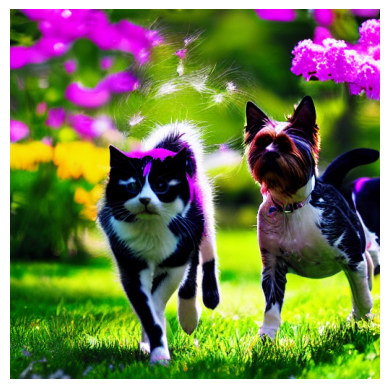

In [38]:
# Define parameters and functions for stable diffusion decoder
guidance_scale = 7.5
num_steps = 50
height = 512
width = 512

device = 'mps'  # M1/M2 chips at macos
#model_version = 'andite/anything-v4.0'
model_version = 'runwayml/stable-diffusion-v1-5'

pipeline = StableDiffusionPipeline.from_pretrained(model_version)
pipeline = pipeline.to(device)

# Diffuse an image into noise using stable diffusion decoder
def stable_diffusion_diffuse(prompt, negative_prompt, guidance_scale, num_steps):
    output = pipeline(prompt=prompt, negative_prompt=negative_prompt, height=height, width=width,
                      guidance_scale=guidance_scale, num_inference_steps=num_steps,
                      needs_intermediate=True, # get intermediate images
                      needs_cross_attention=True # get cross attention weights
                      )
    return output

# Diffuse an image into noise using stable diffusion decoder
stable_diffusion_output = stable_diffusion_diffuse(prompt, negative_prompt, guidance_scale, num_steps)
stable_diffusion_image = stable_diffusion_output['images'][0]

print(np.asarray(stable_diffusion_output['images'][0]).shape)

plt.imshow(stable_diffusion_image)
plt.axis('off')
plt.show()

In [39]:
def poolmax_attn(attns):
    if(isinstance(attns,list)):
        out = [poolmax_attn(x) for x in attns]
    else:
        out, _ = torch.max(attns, dim=1)
        out 
    return out

def poolave_attn(attns):
    if(isinstance(attns,list)):
        out = [poolave_attn(x) for x in attns]
    else:
        out = torch.mean(attns, dim=1)
    return out

def imgattn(attn):
    size = int(np.sqrt(attn.shape[1]))
    attn = attn.reshape(attn.shape[0], size, size, -1)
    return attn.detach().cpu().numpy()

fig_size = 1.5

def showattn(t, token, attns, images, showimage=True, saveimage=False, positive=True, k=0, note='', prefix='test', vmax=None):
    if showimage:
        fig, ax = plt.subplots(figsize=(fig_size, fig_size))
        plt.imshow(images[t][0], vmin=0, vmax=None)
        plt.title(f"timestep {t}", fontsize=6, y=1.02)
        plt.axis('off')
        plt.tight_layout()
        plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
        if saveimage:
            plt.savefig(f"{prefix}_img_t{t}.png", bbox_inches='tight')
        plt.show()
    fig, axs = plt.subplots(ncols=len(attns[t]), figsize=(fig_size*len(attns[t]), fig_size))
    prompt = 1 if positive else 0
    for u, x in enumerate(attns[t]):
        a = imgattn(x[k])
        axs[u].imshow(a[prompt,:,:,token], vmin=0, vmax=None)
        axs[u].set_title(f"timestep {t}, token {token}, unet {u} {note}", fontsize=6, y=1.02)
        axs[u].axis('off')
    plt.tight_layout()
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
    if saveimage:
        plt.savefig(f"{prefix}_attn_t{t}_w{token}_p{prompt}_{note}.png", bbox_inches='tight')
    plt.show()

def show1(t, token, positive=True):
    showattn(t, token, positive=positive, note="ave", attns=timestep_ave, images=timestep_images)
    showattn(t, token, showimage=False, positive=positive, note="max", attns=timestep_max, images=timestep_images)

  0%|          | 0/3 [00:00<?, ?it/s]

0


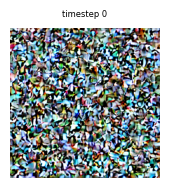

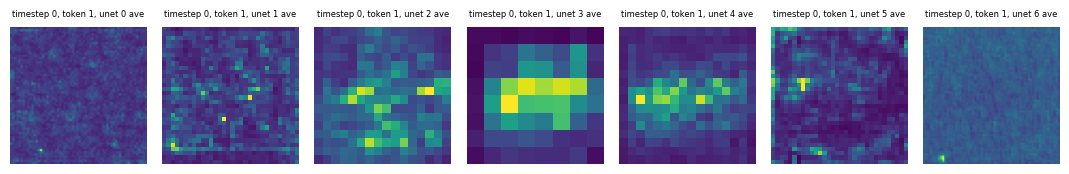

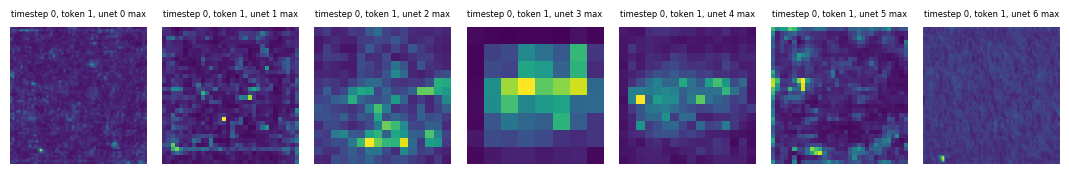

25


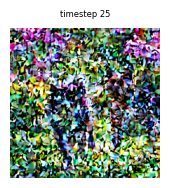

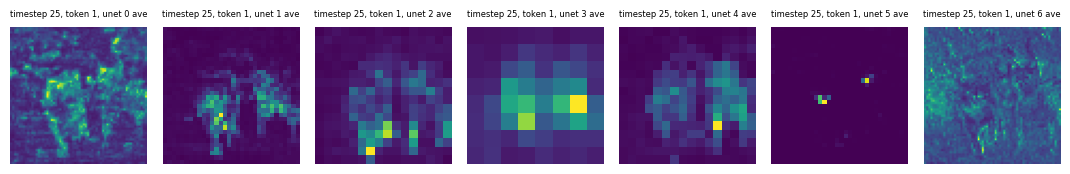

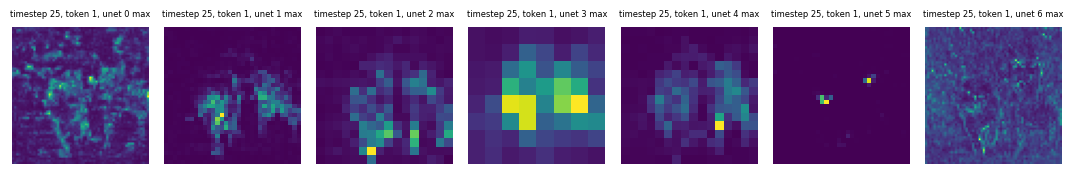

50


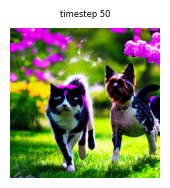

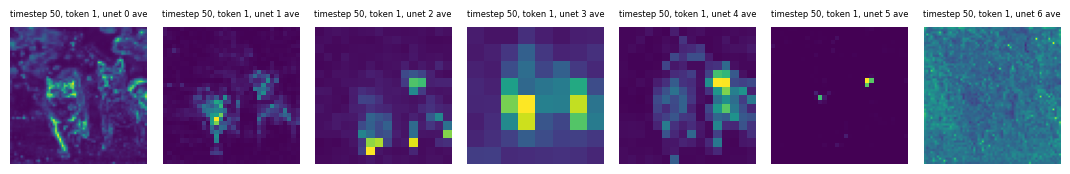

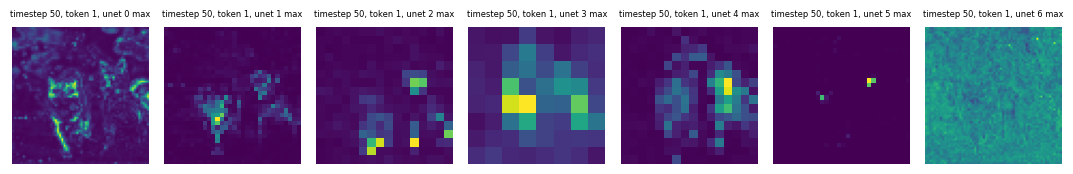

In [40]:
timestep_latents = stable_diffusion_output['timestep_latents']
timestep_images = stable_diffusion_output['timestep_images']
timestep_ave = poolave_attn(stable_diffusion_output['timestep_cross_attentions'])
timestep_max = poolmax_attn(stable_diffusion_output['timestep_cross_attentions'])

token = 1 # dog
for t in tqdm(range(0, num_steps + 1, 25)):
    print(t)
    show1(t,token)

torch.Size([3, 512, 512])


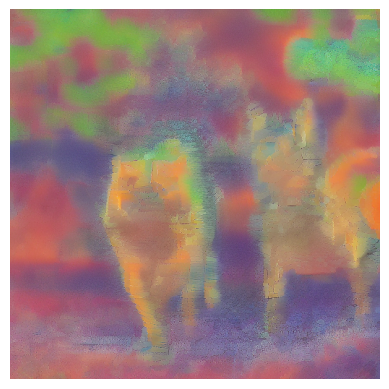

In [41]:
latent_image = pipeline.vae.decoder(timestep_latents[num_steps])

print(latent_image[0].size())

last_image = latent_image[0].detach().cpu().numpy().transpose((1, 2, 0))

maxValue0 = np.amax(last_image[:, :, :])
minValue0 = np.amin(last_image[:, :, :])
last_image = (last_image - minValue0)/(maxValue0 - minValue0)

maxValue = np.amax(last_image[:, :, :])
minValue = np.amin(last_image[:, :, :])
plt.imshow(last_image, vmin=minValue, vmax=maxValue)
plt.axis('off')
plt.show()

### 2-1. Disassembling text-to-image generative AI's decoder

In [44]:
pipeline.vae.decoder

Decoder(
  (conv_in): Conv2d(4, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (up_blocks): ModuleList(
    (0-1): 2 x UpDecoderBlock2D(
      (resnets): ModuleList(
        (0-2): 3 x ResnetBlock2D(
          (norm1): GroupNorm(32, 512, eps=1e-06, affine=True)
          (conv1): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (norm2): GroupNorm(32, 512, eps=1e-06, affine=True)
          (dropout): Dropout(p=0.0, inplace=False)
          (conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (nonlinearity): SiLU()
        )
      )
      (upsamplers): ModuleList(
        (0): Upsample2D(
          (conv): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        )
      )
    )
    (2): UpDecoderBlock2D(
      (resnets): ModuleList(
        (0): ResnetBlock2D(
          (norm1): GroupNorm(32, 512, eps=1e-06, affine=True)
          (conv1): Conv2d(512, 256, kernel_size=(3, 3), stride=(1, 1), paddi

In [43]:
print(timestep_latents[num_steps].size())
print(timestep_latents[num_steps].view(1, 4, -1).size())
print(pipeline.vae.decoder.conv_in(timestep_latents[num_steps]).size())
print(pipeline.vae.decoder.up_blocks[0](pipeline.vae.decoder.conv_in(timestep_latents[num_steps])).size())
print(pipeline.vae.decoder.mid_block(pipeline.vae.decoder.conv_in(timestep_latents[num_steps])).size())

torch.Size([1, 4, 64, 64])
torch.Size([1, 4, 4096])
torch.Size([1, 512, 64, 64])
torch.Size([1, 512, 128, 128])
torch.Size([1, 512, 64, 64])


### 2-2. Calculate the shortest distance between any two points in Stable Diffusion's latent space

In [ ]:
from torch.autograd.functional import jacobian

# Step 1: Compute the Jacobian
%time sd_jac = jacobian(pipeline.vae.decoder, timestep_latents[num_steps])
print(sd_jac.size())

sd_J = torch.reshape(sd_jac, (1, lm_model.config.n_embd, -1))
print(sd_J.size())

# Step 2: Compute Riemannian metric
%time sd_riemannian_metric = compute_riemannian_metric(sd_J)

print(sd_riemannian_metric.size())

num_delta = 0.01
def sd_geodesic_distance(z0, z1, delta=num_delta):
    integrand = 0
    diff = (z1 - z0) * delta
    for i in tqdm(np.arange(0, 1 + delta, delta)):
        #jac = jacobian(lm_model.lm_head, z0 + diff * i)
        jac = jacobian(lm_model.transformer.ln_f, z0 + diff * i)
        J = torch.reshape(jac, (1, lm_model.config.n_embd, -1))
        metric = compute_riemannian_metric(J)
        integrand = integrand + line_element(metric, diff) * delta
    return integrand

z00 = gpt2_hidden_states[0][:, 0, :]
z01 = gpt2_hidden_states[0][:, 1, :]

%time distance = sd_geodesic_distance(z00, z01, delta=num_delta)

print(distance)

### 3. Measure the similarity of distance distributions in two different spaces using GWD

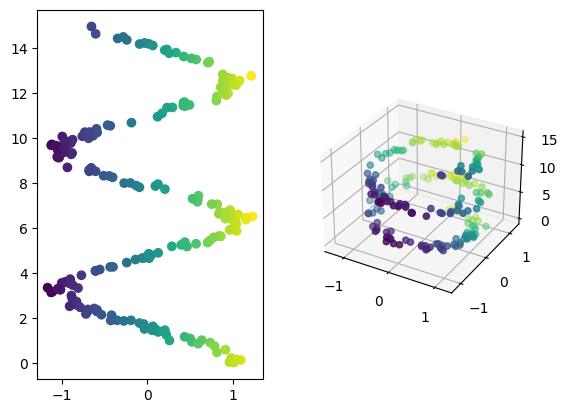

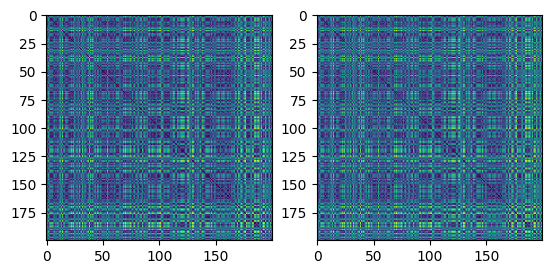

It.  |Loss        |Relative loss|Absolute loss
------------------------------------------------
    0|9.930440e-02|0.000000e+00|0.000000e+00
    1|6.644317e-02|4.945765e-01|3.286123e-02
    2|1.989375e-04|3.329901e+02|6.624423e-02
    3|1.985809e-04|1.795862e-03|3.566239e-07
    4|1.985809e-04|0.000000e+00|0.000000e+00
Gromov-Wasserstein distances: 0.00019858090165908782


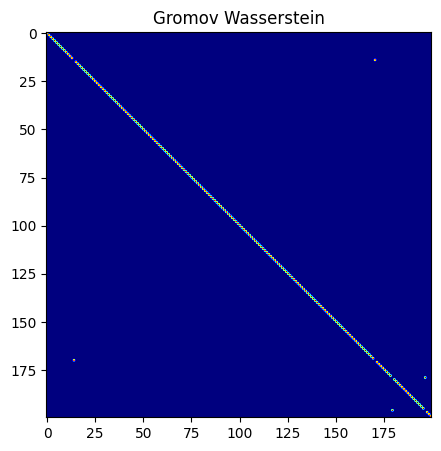

In [ ]:
import ot
import scipy as sp
from mpl_toolkits.mplot3d import Axes3D

n_samples = 200  # nb samples

# example data
zdata = 15 * np.random.random(n_samples)
xdata = np.sin(zdata) + 0.1 * np.random.randn(n_samples)
ydata = np.cos(zdata) + 0.1 * np.random.randn(n_samples)

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.scatter(ydata, zdata, c=ydata)
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter3D(xdata, ydata, zdata, c=ydata)
plt.show()

array_2d = np.array([ydata, zdata]).T
array_3d = np.array([xdata, ydata, zdata]).T

C1 = sp.spatial.distance.cdist(array_2d, array_2d)
C2 = sp.spatial.distance.cdist(array_3d, array_3d)

C1 /= C1.max()
C2 /= C2.max()

plt.figure()
plt.subplot(121)
plt.imshow(C1)
plt.subplot(122)
plt.imshow(C2)
plt.show()

p = ot.unif(n_samples)
q = ot.unif(n_samples)

gw0, log0 = ot.gromov.gromov_wasserstein(C1, C2, p, q, 'square_loss', verbose=True, log=True)
print('Gromov-Wasserstein distances: ' + str(log0['gw_dist']))

plt.figure(1, (10, 5))
plt.imshow(gw0, cmap='jet')
plt.title('Gromov Wasserstein')
plt.show()

### 4. References

#### GPT-2
[Transformers-based Encoder-Decoder Models](https://huggingface.co/blog/encoder-decoder)

[The Illustrated GPT-2 (Visualizing Transformer Language Models)](https://jalammar.github.io/illustrated-gpt2/)

[Interfaces for Explaining Transformer Language Models](https://jalammar.github.io/explaining-transformers/)

[Finding the Words to Say: Hidden State Visualizations for Language Models](https://jalammar.github.io/hidden-states/)
#### GPT-3
[How GPT3 Works - Visualizations and Animations](https://jalammar.github.io/how-gpt3-works-visualizations-animations/)
#### CyberAgent/OpenCALM
[cyberagent/open-calm-7b](https://huggingface.co/cyberagent)
#### Transformer
[The Illustrated Transformer](http://jalammar.github.io/illustrated-transformer/)

[Transformers from Scratch](https://peterbloem.nl/blog/transformers)
#### Stable Diffusion
[The Illustrated Stable Diffusion](https://jalammar.github.io/illustrated-stable-diffusion/)

[Stable Diffusion with 🧨 Diffusers](https://huggingface.co/blog/stable_diffusion)
#### How to calculate latent space curvature
[Inplementation "Latent Space Oddity"](https://github.com/georgiosarvanitidis/geometric_ml)
#### Prof. Shimodaira's Lecture note
[stablediffusion_cross-attention-weights](https://github.com/shimosan/diffusers/blob/20230420-get-internal-info/notebooks/test_stablediffusion_cross-attention-weights.ipynb)
#### OpenAI Cookbook/Visualizing embeddings in 3D
[OpenAI Cookbook/Visualizing embeddings in 3D](https://github.com/openai/openai-cookbook/blob/main/examples/Visualizing_embeddings_in_3D.ipynb)
#### Yoneda lemma and Qualia structure
[Is my "red" your "red"?: Unsupervised alignment of qualia structures via optimal transport](https://psyarxiv.com/h3pqm/)

### misc
[Inconsistency of the last element in hidden_states between PyTorch/Flax GPT2(Neo)](https://lightrun.com/answers/huggingface-transformers-inconsistency-of-the-last-element-in-hidden_states-between-pytorchflax-gpt2neo)


#### 5. Appendix

In [ ]:
from torch.autograd.functional import jacobian

xs = torch.linspace(-1, 1, steps=10)
ys = torch.linspace(-1, 1, steps=10)
z_samples = torch.cartesian_prod(xs, ys)
print(z_samples.size())

def compute_magnification_factor(z):
    z = torch.reshape(z, (1, -1))
    jac = jacobian(lm_model.lm_head, z)
    J = torch.reshape(jac, (1, lm_model.config.n_embd, -1))
    riemannian_metric = compute_riemannian_metric(J)
    magnification_factor = torch.sqrt(torch.linalg.det(riemannian_metric))
    return magnification_factor

%time mf = compute_magnification_factor(z_samples[0, :])
for z in tqdm(z_samples):
    mf = torch.cat((mf, compute_magnification_factor(z)), 0)

print(mf)

In [ ]:
from scipy.ndimage.filters import gaussian_filter
from sklearn.utils.extmath import cartesian

xs_array = xs.numpy()
ys_array = ys.numpy()
z_samples_array = z_samples.numpy()
mf_array = mf.numpy()

xx, yy = np.meshgrid(xs_array, ys_array)
data = mf_array

data = gaussian_filter(data, sigma=15)
plt.figure(figsize=(7,7), dpi=100)
plt.imshow(data, cmap = 'jet', interpolation = 'gaussian', origin='lower',
           aspect='equal',  extent = [min(xs_array), max(xs_array), min(ys_array), max(ys_array)])  
plt.colorbar()
plt.show()